<a href="https://colab.research.google.com/github/Aman7Rathore/Play-Store-App-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project-1/Play Store Data.csv')

In [ ]:
user_review = pd.read_csv('/content/drive/MyDrive/Capstone_Project-1/User Reviews.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

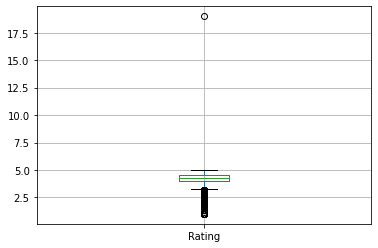

In [ ]:
df.boxplot()

# **By observing boxplot it is clear that there is an outlier and that should be removed**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe302a85f10>]],
      dtype=object)

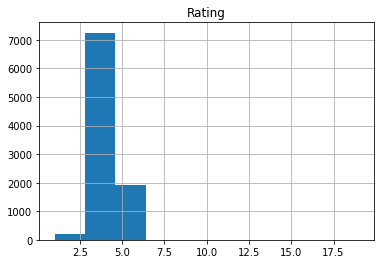

In [ ]:
df.hist()

**Data Cleaning**

In [ ]:
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop([10472],inplace=True)

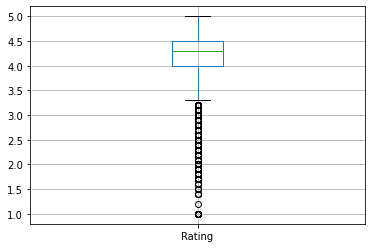

In [ ]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe301257750>]],
      dtype=object)

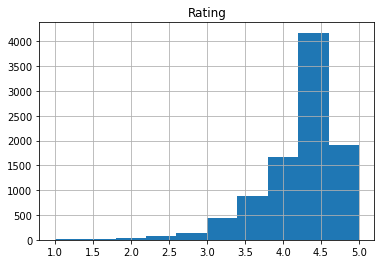

In [ ]:
df.hist()

#**Since the histograph shows right skew we will use median further for data manipulation** 

**Remove columns that are 90% empty**

In [ ]:
threshold = len(df)*0.1
threshold

1084.0

In [ ]:
df.dropna(thresh=threshold,axis=1,inplace=True)

**Data Manupilation**


In [ ]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [ ]:
df['Type'].fillna(str(df['Type'].mode()),inplace=True)
df['Content Rating'].fillna(df['Content Rating'].mode(),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode()),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode()),inplace=True)

In [ ]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# *For analysing an app its price and no. of installs along with rating is important so first we will convert str values of price and installs to numerical values**


In [ ]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

**DATA VISUALIZATION**

In [ ]:
top_rated = df.nlargest(10, 'Rating')
top_rated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
640,Online Girls Chat Group,DATING,5.0,5,5.0M,100.0,Free,0.0,Mature 17+,Dating,"August 2, 2018",8.2,4.0.3 and up
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25M,100.0,Free,0.0,Mature 17+,Dating,"July 20, 2018",1.2.9,4.1 and up
1028,SUMMER SONIC app,EVENTS,5.0,4,61M,500.0,Free,0.0,Everyone,Events,"July 24, 2018",1.0,4.4 and up
1030,Prosperity,EVENTS,5.0,16,2.3M,100.0,Free,0.0,Everyone,Events,"July 9, 2018",1.14,2.0 and up
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21M,100.0,Free,0.0,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up


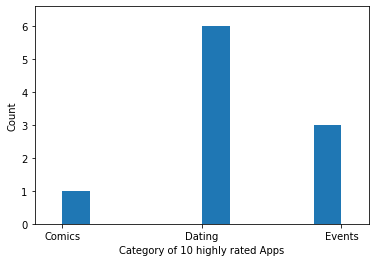

In [ ]:

plt.hist(top_rated['Genres'])
plt.xlabel('Category of 10 highly rated Apps')
plt.ylabel('Count')
plt.margins(0.10)
plt.show()

In [ ]:
x = df.groupby(['Category'])['Rating'].agg(np.mean)
y = df.groupby('Category')['Price'].agg(np.mean)
z = df.groupby('Category')['Installs'].agg(np.mean)

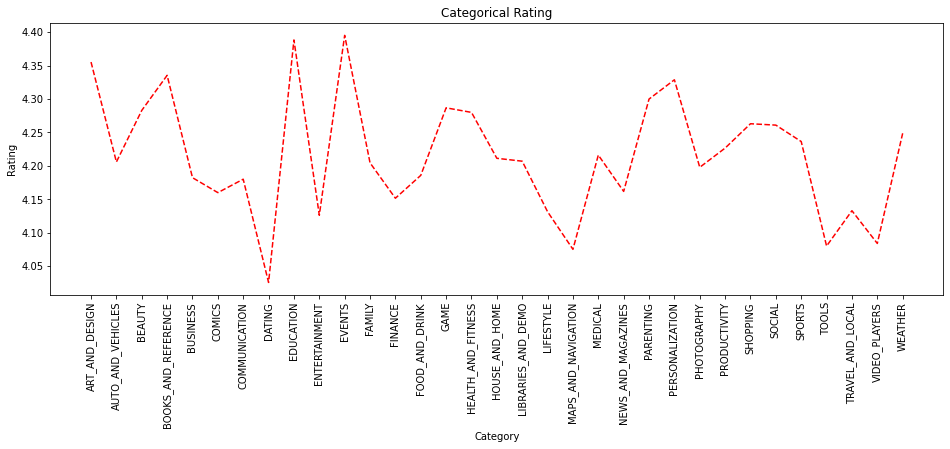

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x,'r--')
plt.title('Categorical Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

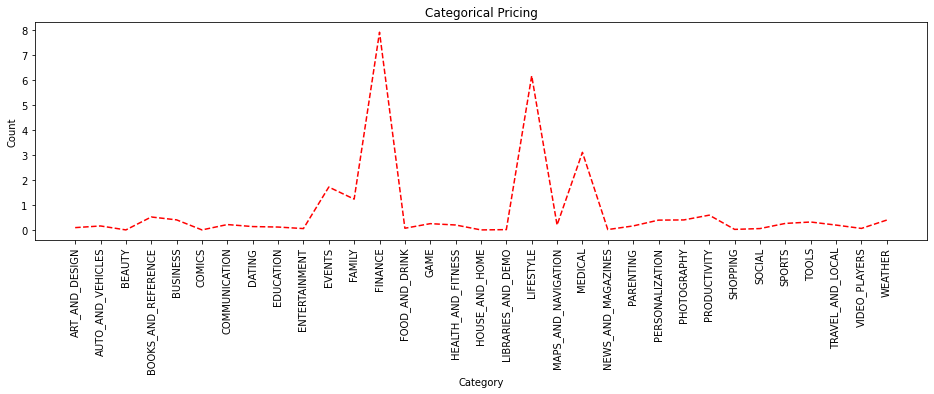

In [ ]:
plt.figure(figsize=(16,4))

plt.plot(y,'r--')
plt.title('Categorical Pricing')

plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


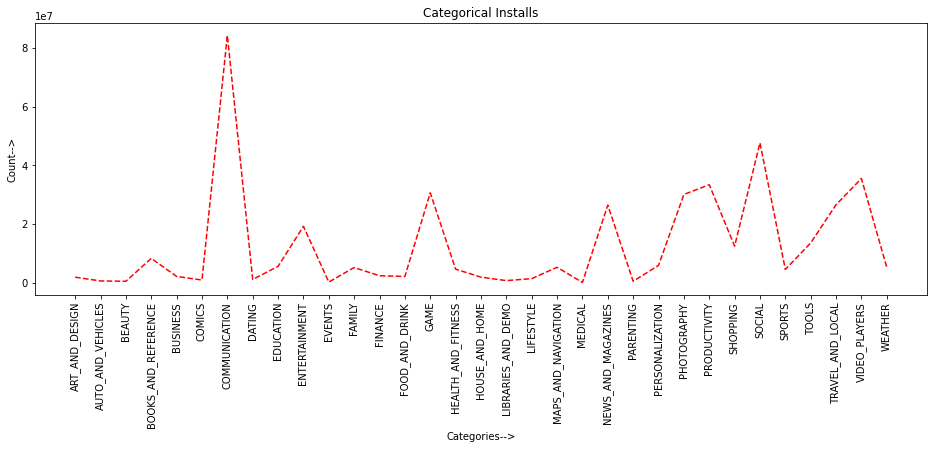

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(z,'r--')
plt.title('Categorical Installs')
plt.xlabel('Categories-->')
plt.ylabel('Count-->')
plt.xticks(rotation=90)
plt.show()

# **Sentiment Analysis based on Reviews**

In [ ]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_review.dropna(inplace=True)

In [ ]:
user_review.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_review.drop_duplicates(inplace=True)

In [ ]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
user_review[user_review.Sentiment_Polarity>0].head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000
12,10 Best Foods for You,"Thank you! Great app!! Add arthritis, eyes, im...",Positive,0.750000,0.875000
13,10 Best Foods for You,Greatest ever Completely awesome maintain heal...,Positive,0.992188,0.866667


In [ ]:
user_review[user_review['Sentiment_Polarity']<0].head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
206,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Not bad, price little bit expensive",Negative,-0.112500,0.622222
240,11st,Horrible ID verification,Negative,-1.000000,1.000000
245,11st,There is nothing missing ~ !!!,Negative,-0.390625,0.050000
246,11st,Refund takes long.. 3 days still received mone...,Negative,-0.325000,0.650000
253,11st,I am trying to update every time but I do not ...,Negative,-0.308333,0.458333


In [ ]:
user_review[user_review['Sentiment_Polarity']==0].head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0
51,10 Best Foods for You,I like,Neutral,0.0,0.0
56,10 Best Foods for You,This helpful,Neutral,0.0,0.0
61,10 Best Foods for You,Luv,Neutral,0.0,0.0
64,10 Best Foods for You,Doesn't work... Zero,Neutral,0.0,0.0
86,10 Best Foods for You,This 5 starr Download,Neutral,0.0,0.0


In [ ]:
user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


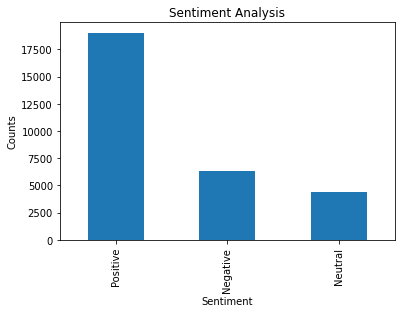

In [ ]:

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
user_review['Sentiment'].value_counts().plot(kind='bar')
plt.show()

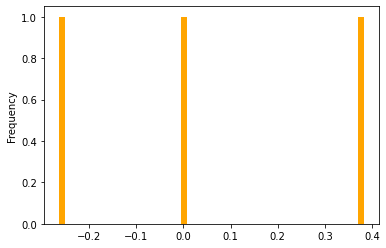

In [ ]:
user_review.groupby('Sentiment')['Sentiment_Polarity'].agg(np.mean).plot(kind='hist',bins=50,color='orange')


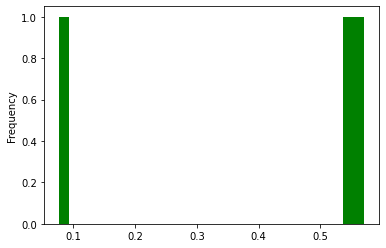

In [ ]:
user_review.groupby('Sentiment')['Sentiment_Subjectivity'].agg(np.mean).plot(kind='hist',bins=30,color='green')


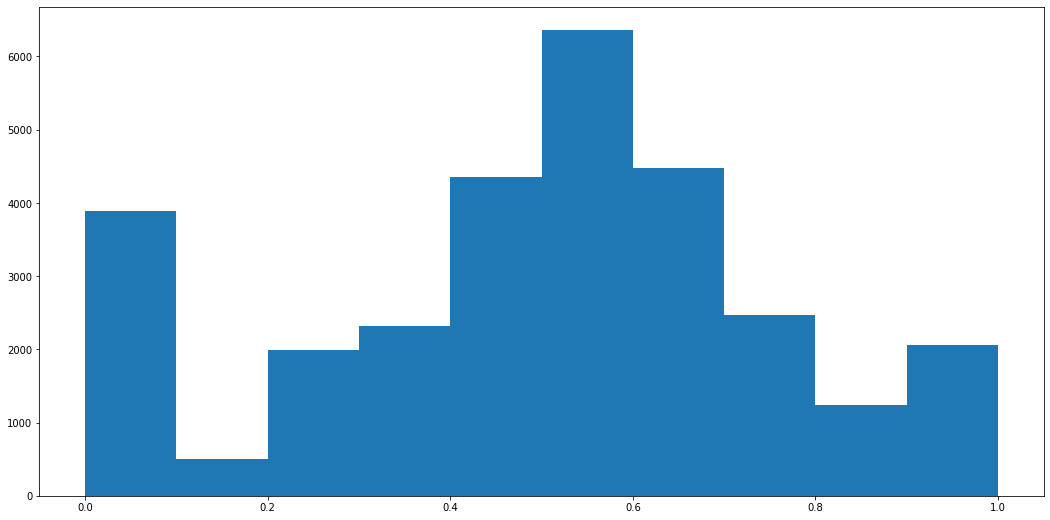

In [ ]:
plt.figure(figsize=(18,9))
plt.hist(user_review['Sentiment_Subjectivity'])
plt.show()


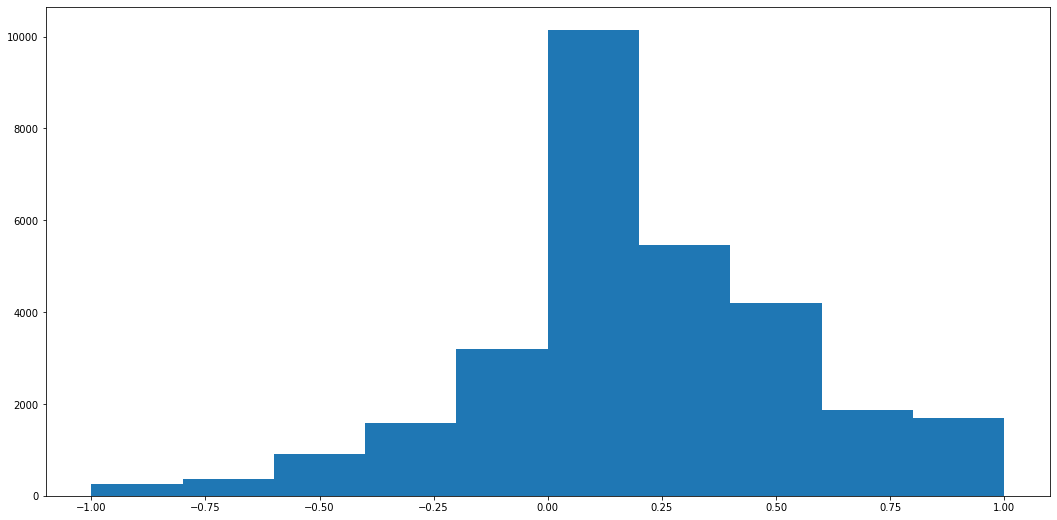

In [ ]:
plt.figure(figsize=(18,9))
plt.hist(user_review['Sentiment_Polarity'])
plt.show()
